# Predicción de Retrasos de Vuelos en la Industria Aérea (Estados Unidos)

## Información del caso

### **TEMA DEL CASO**

Predicción de retrasos en vuelos comerciales y análisis de factores asociados a la puntualidad aérea.

### **ANTECEDENTES**

El dataset flights.csv contiene un histórico de más de 5 millones de registros de vuelos domésticos en Estados Unidos (año 2015), con detalles sobre aerolínea, aeropuerto de origen y destino, horarios programados y reales, y demoras registradas.

La Administración Federal de Aviación (FAA) y el Bureau of Transportation Statistics (BTS) recopilan esta información para monitorear el rendimiento operativo de las aerolíneas y la congestión en los aeropuertos.

El objetivo operativo es anticipar los retrasos significativos (>15 minutos) que generan pérdidas económicas, descontento en los pasajeros y desorganización logística.
El reto consiste en limpiar y analizar un dataset grande y heterogéneo que contiene valores nulos, datos anómalos, codificaciones de aeropuertos no válidas y variables redundantes, para construir un modelo predictivo útil para las aerolíneas y operadores aeroportuarios.

### **OBJETIVO**

Construir un sistema de analítica completo que permita:

1. Implementar un pipeline de limpieza y transformación de datos robusto, capaz de procesar millones de registros de vuelos y detectar datos inválidos o inconsistentes.

2. Realizar un análisis exploratorio (EDA) que identifique las aerolíneas, rutas y aeropuertos con mayores tasas de retraso.

3. Entrenar un modelo de Machine Learning (clasificación) (por ejemplo, LightGBM o RandomForestClassifier) que prediga la probabilidad de que un vuelo llegue con un retraso mayor a 15 minutos.

4. Desplegar el modelo y los resultados mediante una API de predicción y un dashboard analítico, que permita a los usuarios consultar retrasos esperados por ruta, aerolínea u horario.

### **ACTIVIDADES**

**Pipeline**

1. Descargar y cargar el dataset flights.csv junto con los catálogos airlines.csv y airports.csv.

2. Implementar un proceso de limpieza que:

    2.1 Elimine registros de vuelos cancelados o desviados.

    2.2 Valide y normalice los códigos de aeropuertos (ORIGIN_AIRPORT, DESTINATION_AIRPORT) y aerolíneas (AIRLINE).

    2.3 Maneje valores faltantes o anómalos en las columnas de tiempo (SCHEDULED_DEPARTURE, ARRIVAL_DELAY).

3. Realizar la ingeniería de características (feature engineering):

    3.1 Extraer variables como hora de salida, día de la semana, mes, distancia, ruta origen-destino.

    3.2 Crear la variable objetivo binaria DELAYED (1 si ARRIVAL_DELAY > 15, 0 en caso contrario).

### **ANALISIS**

Librerias

In [22]:
# pandas para manejar df (tablas)
import pandas as pd
# missingno para visualizar datos faltantes en df
import missingno as msno
# numpy para manejar datos específicos con pandas (procesamiento computacional más rápido)
import numpy as np

Cargar datos

In [23]:
vuelos = pd.read_csv(r"D:\OneDrive\DOCUMENTOS\Personales\2024\uniandes\8 S\seminario\g11-caso-estudio-complexivo\data\flights.csv")

C:\Users\Adrian Merlo\AppData\Local\Temp\ipykernel_68124\9498344.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  vuelos = pd.read_csv(r"D:\OneDrive\DOCUMENTOS\Personales\2024\uniandes\8 S\seminario\g11-caso-estudio-complexivo\data\flights.csv")


Analisis inicial de los datos

In [4]:
vuelos.head(100)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2015,1,1,4,B6,2001,N358JB,BUF,JFK,535,...,648.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
96,2015,1,1,4,B6,2807,N190JB,PWM,JFK,535,...,635.0,-25.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
97,2015,1,1,4,B6,2023,N324JB,JFK,SJU,535,...,1039.0,19.0,0,0,NaN,0.0,0.0,19.0,0.0,0.0
98,2015,1,1,4,EV,4557,N12967,CRP,IAH,535,...,615.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
vuelos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [6]:
type(vuelos)

pandas.core.frame.DataFrame

In [7]:
vuelos.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [24]:
vuelos = vuelos.rename(
    columns={
        "YEAR":"anio",
        "MONTH":"mes",
        "DAY":"dia",
        "DAY_OF_WEEK":"dia_de_semana",
        "AIRLINE":"aerolinea",
        "FLIGHT_NUMBER":"numero_de_vuelo",
        "TAIL_NUMBER":"numero_matricula_avion",
        "ORIGIN_AIRPORT":"aeropuerto_de_origen",
        "DESTINATION_AIRPORT":"aeropuerto_de_destino",
        "SCHEDULED_DEPARTURE":"hora_programada_salida",
        "DEPARTURE_TIME":"hora_de_salida",
        "DEPARTURE_DELAY":"retraso_en_salida",
        "TAXI_OUT":"rodaje_de_salida",
        "WHEELS_OFF":"hora_de_despegue",
        "SCHEDULED_TIME":"tiempo_programado_de_vuelo",
        "ELAPSED_TIME":"tiempo_trascurrido",
        "AIR_TIME":"tiempo_en_el_aire",
        "DISTANCE":"distacia",
        "WHEELS_ON":"hora_de_aterrizaje",
        "TAXI_IN":"rodaje_en_llegada",
        "SCHEDULED_ARRIVAL":"hora_programada_llegada",
        "ARRIVAL_TIME":"hora_de_llegada",
        "ARRIVAL_DELAY":"retraso_en_llegada",
        "DIVERTED":"desviado",
        "CANCELLED":"cancelado",
        "CANCELLATION_REASON":"motivo_de_cancelacion",
        "AIR_SYSTEM_DELAY":"retraso_por_sistema_aereo",
        "SECURITY_DELAY":"retraso_por_seguridad",
        "AIRLINE_DELAY":"retraso_por_aerolinea",
        "LATE_AIRCRAFT_DELAY":"retraso_por_llegada_tardia_aeronave",
        "WEATHER_DELAY":"retraso_por_meteorologicas",

    }
)

In [25]:
vuelos.head()

,anio,mes,dia,dia_de_semana,aerolinea,numero_de_vuelo,numero_matricula_avion,aeropuerto_de_origen,aeropuerto_de_destino,hora_programada_salida,...,hora_de_llegada,retraso_en_llegada,desviado,cancelado,motivo_de_cancelacion,retraso_por_sistema_aereo,retraso_por_seguridad,retraso_por_aerolinea,retraso_por_llegada_tardia_aeronave,retraso_por_meteorologicas
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
vuelos.nunique()

anio                                      1
mes                                      12
dia                                      31
dia_de_semana                             7
aerolinea                                14
numero_de_vuelo                        6952
numero_matricula_avion                 4897
aeropuerto_de_origen                    930
aeropuerto_de_destino                   930
hora_programada_salida                 1321
hora_de_salida                         1440
retraso_en_salida                      1217
rodaje_de_salida                        184
hora_de_despegue                       1440
tiempo_programado_de_vuelo              550
tiempo_trascurrido                      712
tiempo_en_el_aire                       675
distacia                               1363
hora_de_aterrizaje                     1440
rodaje_en_llegada                       185
hora_programada_llegada                1435
hora_de_llegada                        1440
retraso_en_llegada              

In [28]:
vuelos.aeropuerto_de_origen.unique()

array(['ANC', 'LAX', 'SFO', 'SEA', 'LAS', 'DEN', 'SLC', 'PDX', 'FAI',
       'MSP', 'PHX', 'SJU', 'PBG', 'IAG', 'PSE', 'BQN', 'ORD', 'GEG',
       'HNL', 'ONT', 'MCO', 'BOS', 'HIB', 'ABR', 'MAF', 'DFW', 'MKE',
       'IAH', 'BNA', 'BRO', 'VPS', 'BOI', 'BJI', 'SGF', 'PHL', 'SBN',
       'RDD', 'EUG', 'IAD', 'BUF', 'PWM', 'JFK', 'CRP', 'PIA', 'FAT',
       'SMF', 'AUS', 'MCI', 'ATL', 'JAX', 'MFR', 'IDA', 'MSN', 'DCA',
       'SAT', 'CHS', 'SBA', 'SMX', 'IND', 'CLE', 'GSP', 'BDL', 'ABI',
       'RIC', 'BFL', 'OMA', 'RDM', 'FLL', 'CID', 'TPA', 'SYR', 'ROC',
       'TYR', 'LAN', 'XNA', 'GSO', 'EWR', 'PBI', 'RSW', 'OAK', 'PVD',
       'RNO', 'PIT', 'ABQ', 'MIA', 'BWI', 'LGA', 'TUL', 'LIT', 'MSY',
       'OKC', 'ATW', 'PNS', 'MEM', 'TYS', 'MHT', 'SAV', 'CLT', 'GRB',
       'ABE', 'JAN', 'OAJ', 'FAR', 'ERI', 'LEX', 'CWA', 'MSO', 'TTN',
       'AMA', 'CLL', 'HOU', 'JLN', 'MLI', 'RDU', 'CVG', 'MHK', 'MOB',
       'TLH', 'BHM', 'CAE', 'TXK', 'ACY', 'DTW', 'RAP', 'TUS', 'EAU',
       'DLH', 'FSD',

In [30]:
vuelos[vuelos['aeropuerto_de_origen'] == '13933']


,anio,mes,dia,dia_de_semana,aerolinea,numero_de_vuelo,numero_matricula_avion,aeropuerto_de_origen,aeropuerto_de_destino,hora_programada_salida,...,hora_de_llegada,retraso_en_llegada,desviado,cancelado,motivo_de_cancelacion,retraso_por_sistema_aereo,retraso_por_seguridad,retraso_por_aerolinea,retraso_por_llegada_tardia_aeronave,retraso_por_meteorologicas
4855634,2015,10,30,5,B6,1887,N353JB,13933,13204,1658,...,2005.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4857326,2015,10,30,5,B6,2019,N265JB,13933,11697,1835,...,2131.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4869414,2015,10,31,6,B6,1887,N179JB,13933,13204,1658,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
4870390,2015,10,31,6,B6,2019,N267JB,13933,11697,1835,...,2124.0,-28.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
vuelos[vuelos['AIRLINE'] == 'B6']


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
39,2015,1,1,4,B6,304,N607JB,SJU,JFK,155,...,501.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
45,2015,1,1,4,B6,1990,N597JB,SJU,EWR,206,...,516.0,4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48,2015,1,1,4,B6,668,N653JB,PSE,MCO,255,...,451.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
50,2015,1,1,4,B6,1030,N239JB,BQN,MCO,307,...,520.0,20.0,0,0,NaN,20.0,0.0,0.0,0.0,0.0
51,2015,1,1,4,B6,262,N627JB,SJU,BOS,330,...,619.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Revisar % de aeropuetos de origen y destino que no existen en flights.csv - airports.csv

In [40]:
from pathlib import Path

base = Path(r"D:\OneDrive\DOCUMENTOS\Personales\2024\uniandes\8 S\seminario\proyecto-demo-games\data")
print("Carpeta existe?:", base.exists())
print("Contenido CSV en la carpeta:")
print([p.name for p in base.glob("*.csv")])


Carpeta existe?: True
Contenido CSV en la carpeta:
['DailyDelhiClimateTrain.csv', 'games.csv']


In [39]:
# --- 1️⃣ Rutas de archivos ---
flights_path = r"D:\OneDrive\DOCUMENTOS\Personales\2024\uniandes\8 S\seminario\proyecto-demo-games\data\flights.csv"
airports_path = r"D:\OneDrive\DOCUMENTOS\Personales\2024\uniandes\8 S\seminario\proyecto-demo-games\data\airports.csv"

# --- 2️⃣ Cargar datasets ---
flights = pd.read_csv(flights_path, usecols=["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"])
airports = pd.read_csv(airports_path, usecols=["IATA_CODE"])

# --- 3️⃣ Normalizar formatos (importante por espacios o mayúsculas) ---
flights["ORIGIN_AIRPORT"] = flights["ORIGIN_AIRPORT"].astype(str).str.strip().str.upper()
flights["DESTINATION_AIRPORT"] = flights["DESTINATION_AIRPORT"].astype(str).str.strip().str.upper()
airports["IATA_CODE"] = airports["IATA_CODE"].astype(str).str.strip().str.upper()

# --- 4️⃣ Crear conjunto de códigos válidos ---
airports_set = set(airports["IATA_CODE"])

# --- 5️⃣ Detectar aeropuertos de origen y destino inexistentes ---
mask_origin_not_in = ~flights["ORIGIN_AIRPORT"].isin(airports_set)
mask_dest_not_in   = ~flights["DESTINATION_AIRPORT"].isin(airports_set)

# --- 6️⃣ Calcular totales ---
total = len(flights)
origin_missing = mask_origin_not_in.sum()
dest_missing   = mask_dest_not_in.sum()

# --- 7️⃣ Calcular porcentajes ---
pct_origin = (origin_missing / total) * 100
pct_dest   = (dest_missing / total) * 100

print("📊 Resultados de validación:")
print(f"Total de registros en flights.csv: {total:,}")
print(f"Aeropuertos ORIGIN no encontrados: {origin_missing:,} ({pct_origin:.2f}%)")
print(f"Aeropuertos DESTINATION no encontrados: {dest_missing:,} ({pct_dest:.2f}%)")

# --- 8️⃣ (Opcional) Ver los códigos que faltan ---
missing_origin_codes = sorted(set(flights.loc[mask_origin_not_in, "ORIGIN_AIRPORT"]))
missing_dest_codes   = sorted(set(flights.loc[mask_dest_not_in, "DESTINATION_AIRPORT"]))

print("\n✈️ Códigos de ORIGIN no encontrados:")
print(missing_origin_codes[:2000])  # muestra los primeros 20

print("\n🏁 Códigos de DESTINATION no encontrados:")
print(missing_dest_codes[:2000])

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\OneDrive\\DOCUMENTOS\\Personales\\2024\\uniandes\\8 S\\seminario\\proyecto-demo-games\\data\\flights.csv'

eliminar registros de aeropuertos que no existen

In [33]:
# ---  Definir rutas ---
flights_path = "..data\flights.csv"
airports_path = "../data/airports.csv"

# ---  Cargar datasets con columnas relevantes ---
flights = pd.read_csv(flights_path, usecols=["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"])
airports = pd.read_csv(airports_path, usecols=["IATA_CODE"])

# ---  Normalizar textos (evita errores por espacios o minúsculas) ---
flights["ORIGIN_AIRPORT"] = flights["ORIGIN_AIRPORT"].astype(str).str.strip().str.upper()
flights["DESTINATION_AIRPORT"] = flights["DESTINATION_AIRPORT"].astype(str).str.strip().str.upper()
airports["IATA_CODE"] = airports["IATA_CODE"].astype(str).str.strip().str.upper()

# ---  Crear conjunto de códigos válidos ---
airports_set = set(airports["IATA_CODE"])

# ---  Detectar aeropuertos inválidos ---
mask_origin_not_in = ~flights["ORIGIN_AIRPORT"].isin(airports_set)
mask_dest_not_in   = ~flights["DESTINATION_AIRPORT"].isin(airports_set)

# ---  Estadísticas de calidad ---
total = len(flights)
origin_missing = mask_origin_not_in.sum()
dest_missing   = mask_dest_not_in.sum()
pct_origin = (origin_missing / total) * 100
pct_dest   = (dest_missing / total) * 100

print(" Resultados de validación de aeropuertos:")
print(f"Total registros flights.csv: {total:,}")
print(f"ORIGIN_AIRPORT inválidos: {origin_missing:,} ({pct_origin:.3f}%)")
print(f"DESTINATION_AIRPORT inválidos: {dest_missing:,} ({pct_dest:.3f}%)")

# ---  Ver algunos códigos que no existen ---
missing_origin_codes = sorted(set(flights.loc[mask_origin_not_in, "ORIGIN_AIRPORT"]))
missing_dest_codes   = sorted(set(flights.loc[mask_dest_not_in, "DESTINATION_AIRPORT"]))

print("\ Ejemplos de códigos ORIGIN no encontrados:")
print(missing_origin_codes[:10])

print("\ Ejemplos de códigos DESTINATION no encontrados:")
print(missing_dest_codes[:10])

# ---  Eliminar los registros inválidos ---
clean_flights = flights[~mask_origin_not_in & ~mask_dest_not_in].copy()

print(f"\ Dataset limpio generado con {len(clean_flights):,} registros (eliminados {total - len(clean_flights):,})")

# # ---  (Opcional) Guardar el dataset limpio ---
# clean_flights.to_csv("../data/flights_clean.csv", index=False)
# print(" Archivo guardado en ../data/flights_clean.csv")


<>:37: SyntaxWarning: invalid escape sequence '\ '
<>:40: SyntaxWarning: invalid escape sequence '\ '
<>:46: SyntaxWarning: invalid escape sequence '\ '
<>:37: SyntaxWarning: invalid escape sequence '\ '
<>:40: SyntaxWarning: invalid escape sequence '\ '
<>:46: SyntaxWarning: invalid escape sequence '\ '
C:\Users\Adrian Merlo\AppData\Local\Temp\ipykernel_68124\407201502.py:37: SyntaxWarning: invalid escape sequence '\ '
  print("\ Ejemplos de códigos ORIGIN no encontrados:")
C:\Users\Adrian Merlo\AppData\Local\Temp\ipykernel_68124\407201502.py:40: SyntaxWarning: invalid escape sequence '\ '
  print("\ Ejemplos de códigos DESTINATION no encontrados:")
C:\Users\Adrian Merlo\AppData\Local\Temp\ipykernel_68124\407201502.py:46: SyntaxWarning: invalid escape sequence '\ '
  print(f"\ Dataset limpio generado con {len(clean_flights):,} registros (eliminados {total - len(clean_flights):,})")
C:\Users\Adrian Merlo\AppData\Local\Temp\ipykernel_68124\407201502.py:6: DtypeWarning: Columns (7,8) hav

 Resultados de validación de aeropuertos:
Total registros flights.csv: 5,819,079
ORIGIN_AIRPORT inválidos: 486,165 (8.355%)
DESTINATION_AIRPORT inválidos: 486,165 (8.355%)
\ Ejemplos de códigos ORIGIN no encontrados:
['10135', '10136', '10140', '10141', '10146', '10154', '10155', '10157', '10158', '10165']
\ Ejemplos de códigos DESTINATION no encontrados:
['10135', '10136', '10140', '10141', '10146', '10154', '10155', '10157', '10158', '10165']
\ Dataset limpio generado con 5,332,914 registros (eliminados 486,165)


In [34]:
clean_flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332914 entries, 0 to 5819078
Data columns (total 2 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   ORIGIN_AIRPORT       object
 1   DESTINATION_AIRPORT  object
dtypes: object(2)
memory usage: 122.1+ MB


In [13]:
vuelos[vuelos['AIRLINE'] == 'B6'][['AIRLINE', 'FLIGHT_NUMBER', 'MATRICULA', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']] 

KeyError: "['MATRICULA'] not in index"

In [14]:
vuelos[(vuelos['AIRLINE'] == 'B6') & (vuelos['MATRICULA'] == 'N353JB')][['AIRLINE', 'MATRICULA', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']]

KeyError: 'MATRICULA'

In [15]:
vuelos[(vuelos['AIRLINE'] == 'B6') & (vuelos['MATRICULA'] == 'N353JB')]['ORIGIN_AIRPORT'].unique()

KeyError: 'MATRICULA'

In [16]:
print(len(vuelos()))

TypeError: 'DataFrame' object is not callable

In [17]:
vuelos.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [ ]:
type(vuelos)

pandas.core.frame.DataFrame

In [ ]:
vuelos["ARRIVAL_TIME"].dtypes

type(vuelos["ARRIVAL_TIME"])

pandas.core.series.Series

In [ ]:
valores_unicos=print(vuelos.nunique())

YEAR                      1
MONTH                    12
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6952
TAIL_NUMBER            4897
ORIGIN_AIRPORT          930
DESTINATION_AIRPORT     930
SCHEDULED_DEPARTURE    1321
DEPARTURE_TIME         1440
DEPARTURE_DELAY        1217
TAXI_OUT                184
WHEELS_OFF             1440
SCHEDULED_TIME          550
ELAPSED_TIME            712
AIR_TIME                675
DISTANCE               1363
WHEELS_ON              1440
TAXI_IN                 185
SCHEDULED_ARRIVAL      1435
ARRIVAL_TIME           1440
ARRIVAL_DELAY          1240
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        570
SECURITY_DELAY          154
AIRLINE_DELAY          1067
LATE_AIRCRAFT_DELAY     695
WEATHER_DELAY           632
dtype: int64


In [ ]:
valores_ausentes=print(vuelos.isnull().sum())

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64


In [ ]:
vuelos.isnull().sum()
print()


YEAR                   0.000000
MONTH                  0.000000
DAY                    0.000000
DAY_OF_WEEK            0.000000
AIRLINE                0.000000
FLIGHT_NUMBER          0.000000
TAIL_NUMBER            0.002530
ORIGIN_AIRPORT         0.000000
DESTINATION_AIRPORT    0.000000
SCHEDULED_DEPARTURE    0.000000
DEPARTURE_TIME         0.014805
DEPARTURE_DELAY        0.014805
TAXI_OUT               0.015303
WHEELS_OFF             0.015303
SCHEDULED_TIME         0.000001
ELAPSED_TIME           0.018056
AIR_TIME               0.018056
DISTANCE               0.000000
WHEELS_ON              0.015898
TAXI_IN                0.015898
SCHEDULED_ARRIVAL      0.000000
ARRIVAL_TIME           0.015898
ARRIVAL_DELAY          0.018056
DIVERTED               0.000000
CANCELLED              0.000000
CANCELLATION_REASON    0.984554
AIR_SYSTEM_DELAY       0.817250
SECURITY_DELAY         0.817250
AIRLINE_DELAY          0.817250
LATE_AIRCRAFT_DELAY    0.817250
WEATHER_DELAY          0.817250
dtype: f

Porcentaje de valores ausentes de todas las columnas

In [ ]:
vuelos.isnull().mean()*100 #porcentaje de valores nulos

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
WEATHER_DE

In [ ]:
round(vuelos.isnull().mean()*100,2) #porcentaje de valores nulos

YEAR                    0.00
MONTH                   0.00
DAY                     0.00
DAY_OF_WEEK             0.00
AIRLINE                 0.00
FLIGHT_NUMBER           0.00
TAIL_NUMBER             0.25
ORIGIN_AIRPORT          0.00
DESTINATION_AIRPORT     0.00
SCHEDULED_DEPARTURE     0.00
DEPARTURE_TIME          1.48
DEPARTURE_DELAY         1.48
TAXI_OUT                1.53
WHEELS_OFF              1.53
SCHEDULED_TIME          0.00
ELAPSED_TIME            1.81
AIR_TIME                1.81
DISTANCE                0.00
WHEELS_ON               1.59
TAXI_IN                 1.59
SCHEDULED_ARRIVAL       0.00
ARRIVAL_TIME            1.59
ARRIVAL_DELAY           1.81
DIVERTED                0.00
CANCELLED               0.00
CANCELLATION_REASON    98.46
AIR_SYSTEM_DELAY       81.72
SECURITY_DELAY         81.72
AIRLINE_DELAY          81.72
LATE_AIRCRAFT_DELAY    81.72
WEATHER_DELAY          81.72
dtype: float64

<Axes: >

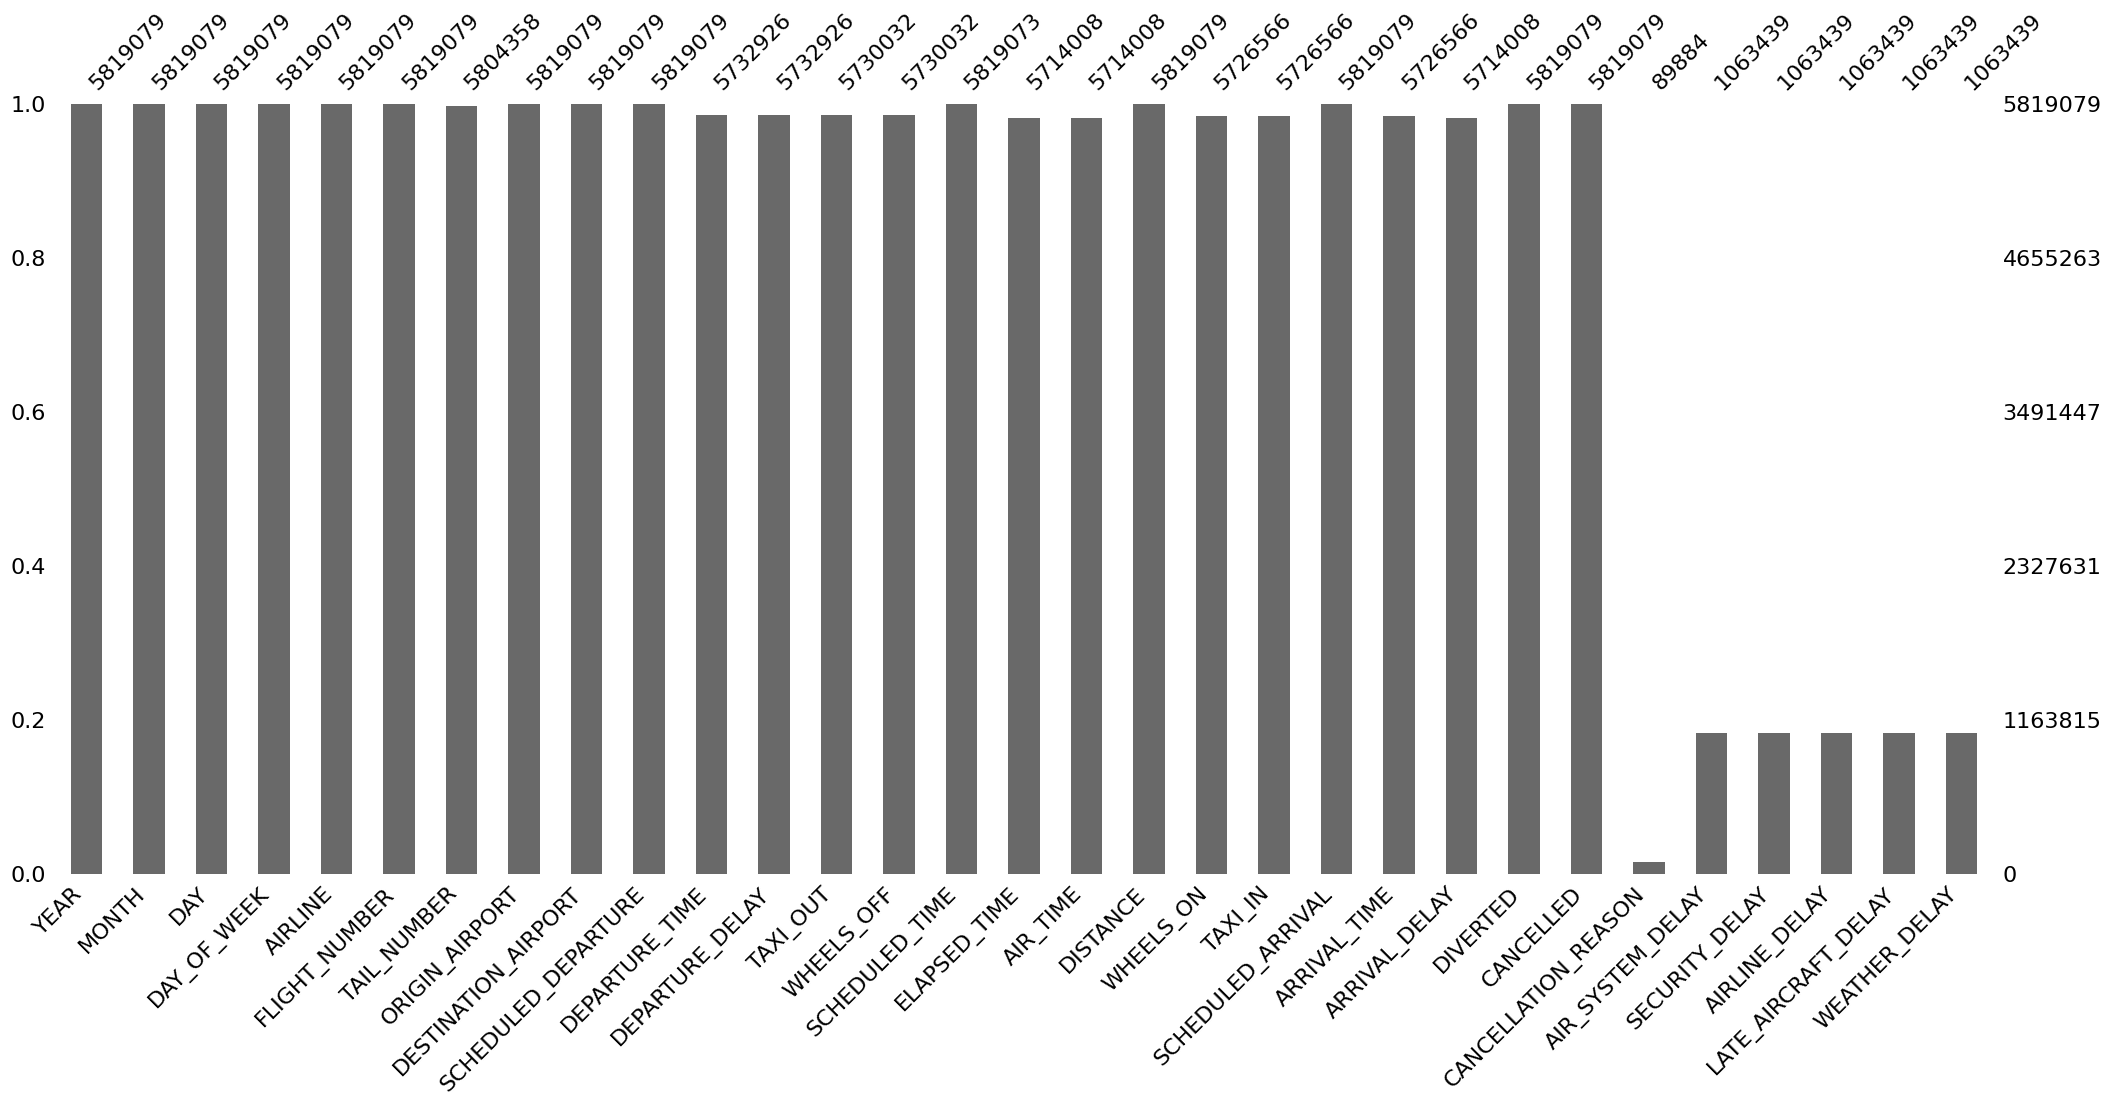

In [ ]:
msno.bar(vuelos)

matriz de valores ausentes para ver en que posición estan 

<Axes: >

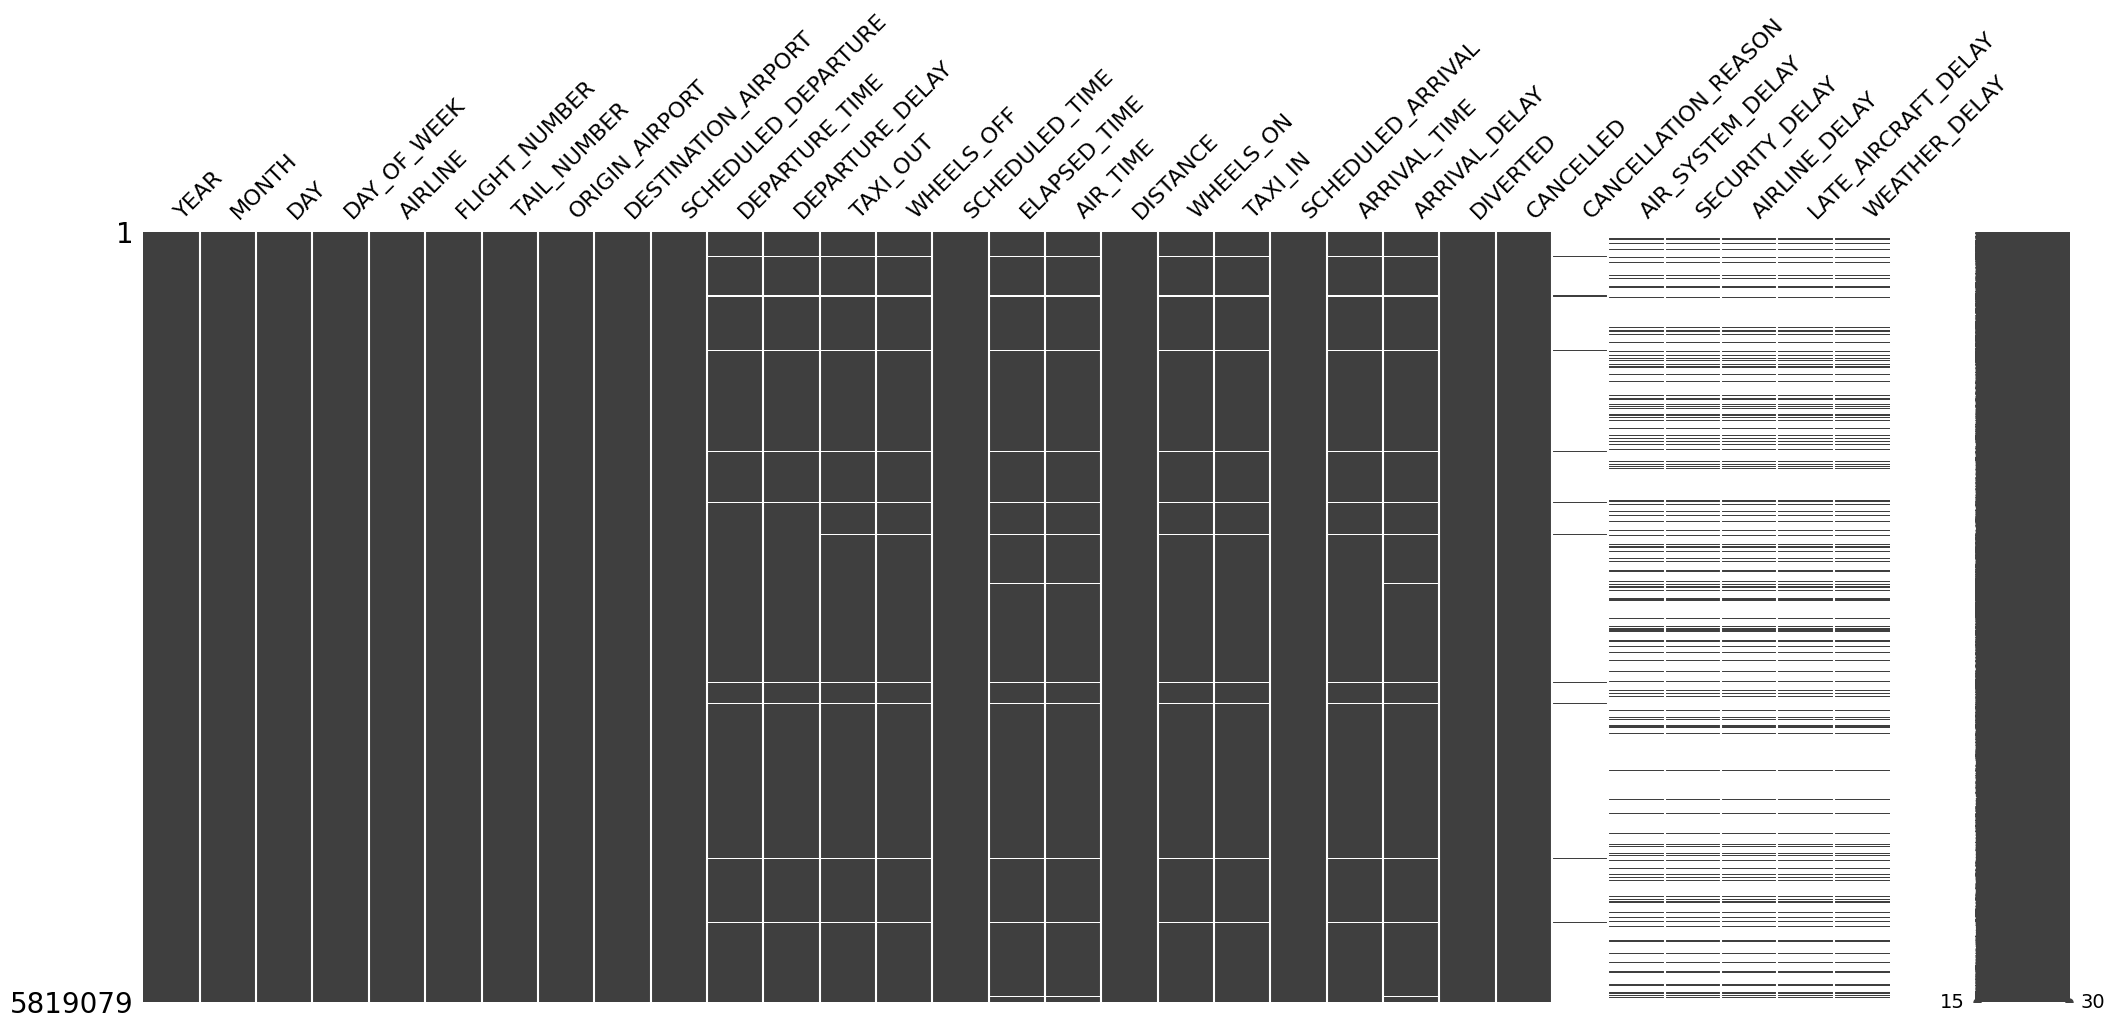

In [ ]:
msno.matrix(vuelos)

Un head map de correlación entre valores faltantes 

<Axes: >

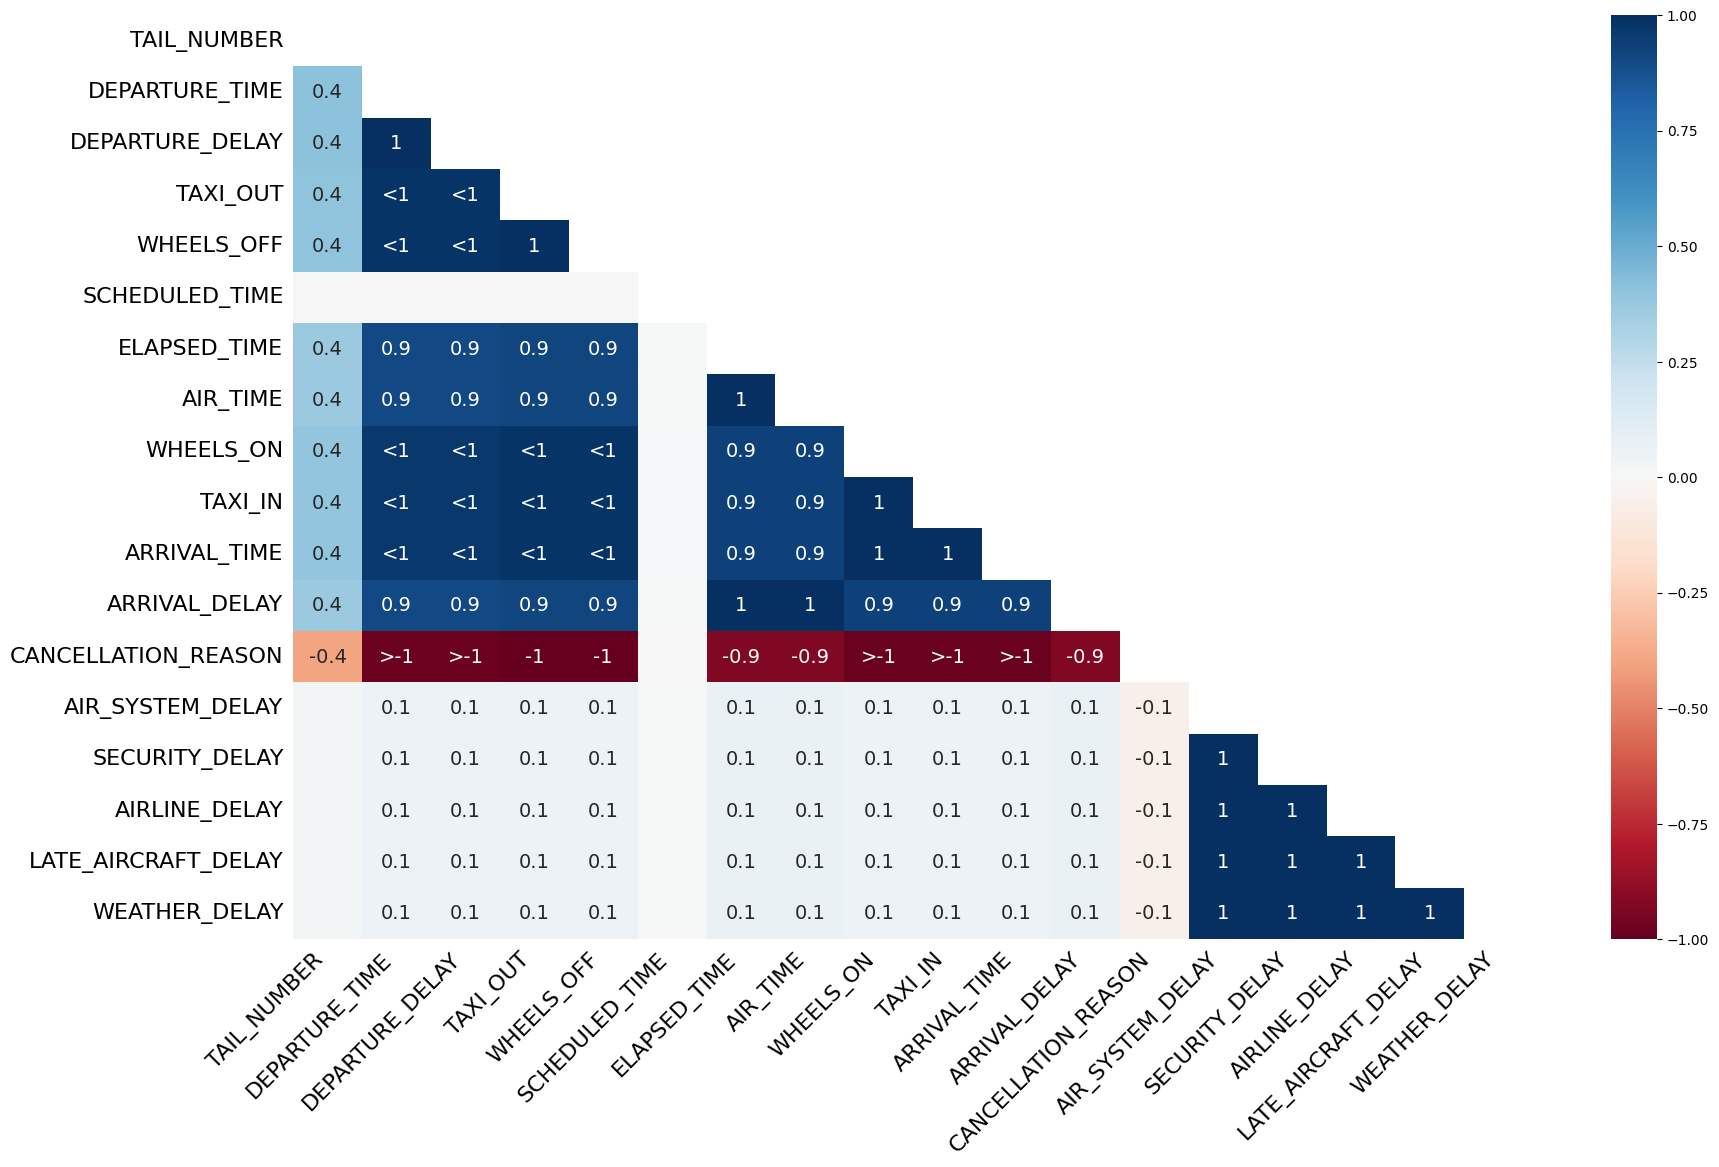

In [11]:
msno.heatmap(vuelos)

## Analisar de forma Rapida los datos x colunas

In [ ]:
vuelos["ARRIVAL_TIME"].value_counts()

ARRIVAL_TIME
1645.0    6490
2053.0    6485
2051.0    6485
2050.0    6482
2056.0    6477
          ... 
409.0       51
313.0       51
332.0       51
316.0       49
339.0       48
Name: count, Length: 1440, dtype: int64

In [ ]:
vuelos["ARRIVAL_TIME"].value_counts(normalize=True)*100

ARRIVAL_TIME
1645.0    0.113331
2053.0    0.113244
2051.0    0.113244
2050.0    0.113192
2056.0    0.113104
            ...   
409.0     0.000891
313.0     0.000891
332.0     0.000891
316.0     0.000856
339.0     0.000838
Name: proportion, Length: 1440, dtype: float64

### Automatización del código values_count()

vuelos.columns()

In [ ]:
vuelos.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [ ]:
for col in vuelos.columns:
    print(vuelos[col].value_counts())
    print(vuelos[col].value_counts(normalize=True)*100)
    print()

YEAR
2015    5819079
Name: count, dtype: int64
YEAR
2015    100.0
Name: proportion, dtype: float64

MONTH
7     520718
8     510536
3     504312
6     503897
5     496993
10    486165
4     485151
12    479230
1     469968
11    467972
9     464946
2     429191
Name: count, dtype: int64
MONTH
7     8.948461
8     8.773485
3     8.666526
6     8.659394
5     8.540750
10    8.354673
4     8.337247
12    8.235496
1     8.076330
11    8.042029
9     7.990027
2     7.375583
Name: proportion, dtype: float64

DAY
2     195986
16    195899
20    195707
13    195089
9     194224
8     193964
23    193560
19    193284
15    192950
22    192725
27    191920
28    191401
18    191393
17    191319
6     191232
4     190893
12    190872
11    190756
3     190007
5     189766
1     189477
21    189413
10    189288
14    188611
7     187598
26    187387
25    187317
24    185017
29    179441
30    178771
31    103812
Name: count, dtype: int64
DAY
2     3.367990
16    3.366495
20    3.363195
13    3.35

In [ ]:
for col in vuelos.columns:
    print(f"Se enseña la columna: {col}")
    print(vuelos[col].value_counts)
    print(vuelos[col].value_counts(normalize=True,dropna=False)*100)
    print()

Se enseña la columna: YEAR
<bound method IndexOpsMixin.value_counts of 0          2015
1          2015
2          2015
3          2015
4          2015
           ... 
5819074    2015
5819075    2015
5819076    2015
5819077    2015
5819078    2015
Name: YEAR, Length: 5819079, dtype: int64>
YEAR
2015    100.0
Name: proportion, dtype: float64

Se enseña la columna: MONTH
<bound method IndexOpsMixin.value_counts of 0           1
1           1
2           1
3           1
4           1
           ..
5819074    12
5819075    12
5819076    12
5819077    12
5819078    12
Name: MONTH, Length: 5819079, dtype: int64>
MONTH
7     8.948461
8     8.773485
3     8.666526
6     8.659394
5     8.540750
10    8.354673
4     8.337247
12    8.235496
1     8.076330
11    8.042029
9     7.990027
2     7.375583
Name: proportion, dtype: float64

Se enseña la columna: DAY
<bound method IndexOpsMixin.value_counts of 0           1
1           1
2           1
3           1
4           1
           ..
5819074    31

sodigo para ver solo tipos de datos


In [ ]:
vuelos.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [ ]:
reset_index()

NameError: name 'reset_index' is not defined

In [ ]:
(vuelos["ARRIVAL_TIME"].value_counts(normalize=True)*100).reset_index().sort_values(by="ARRIVAL_TIME")

,ARRIVAL_TIME,proportion
992,1.0,0.054046
1006,2.0,0.047760
1011,3.0,0.045856
1012,4.0,0.045769
1013,5.0,0.045036
...,...,...
995,2356.0,0.053103
997,2357.0,0.052405
999,2358.0,0.051444
1002,2359.0,0.050484


Resumen estadístico .describe()

de las columnas numericas

total de datos que se tienen en las columns, promedios 

In [ ]:
vuelos.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [ ]:
vuelos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [ ]:
vuelos.select_dtypes(include="number")

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,98,5,2354.0,-11.0,21.0,15.0,...,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,2336,10,2.0,-8.0,12.0,14.0,...,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,840,20,18.0,-2.0,16.0,34.0,...,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,258,20,15.0,-5.0,15.0,30.0,...,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,135,25,24.0,-1.0,11.0,35.0,...,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,688,2359,2355.0,-4.0,22.0,17.0,...,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,745,2359,2355.0,-4.0,17.0,12.0,...,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,1503,2359,2350.0,-9.0,17.0,7.0,...,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,333,2359,2353.0,-6.0,10.0,3.0,...,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
categirical_data=vuelos.select_dtypes(include="object")
categirical_data.describe()

,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON
count,5819079,5804358,5819079,5819079,89884
unique,14,4897,930,930,4
top,WN,N480HA,ATL,ATL,B
freq,1261855,3768,346836,346904,48851


In [ ]:
numerical_data=vuelos.select_dtypes(include="float64")
numerical_data.describe()

,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,WHEELS_ON,TAXI_IN,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,5.819073e+06,5.714008e+06,5.714008e+06,5.726566e+06,5.726566e+06,5.726566e+06,5.714008e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,1.416859e+02,1.370062e+02,1.135116e+02,1.471469e+03,7.434971e+00,1.476491e+03,4.407057e+00,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,7.521058e+01,7.421107e+01,7.223082e+01,5.221879e+02,5.638548e+00,5.263197e+02,3.927130e+01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,1.800000e+01,1.400000e+01,7.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,8.500000e+01,8.200000e+01,6.000000e+01,1.054000e+03,4.000000e+00,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,1.230000e+02,1.180000e+02,9.400000e+01,1.509000e+03,6.000000e+00,1.512000e+03,-5.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,1.730000e+02,1.680000e+02,1.440000e+02,1.911000e+03,9.000000e+00,1.917000e+03,8.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,7.180000e+02,7.660000e+02,6.900000e+02,2.400000e+03,2.480000e+02,2.400000e+03,1.971000e+03,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


## cambiar tipo de dato a una columna


In [ ]:
vuelos["ARRIVAL_DELAY"].astype("object")    

0         -22.0
1          -9.0
2           5.0
3          -9.0
4         -21.0
           ... 
5819074   -26.0
5819075   -16.0
5819076    -8.0
5819077   -10.0
5819078     2.0
Name: ARRIVAL_DELAY, Length: 5819079, dtype: object

limpiar la columna User_Score

In [ ]:
vuelos["ARRIVAL_DELAY"].value_counts(dropna=False)

ARRIVAL_DELAY
-8.0       176899
-9.0       176016
-10.0      175232
-7.0       174524
-11.0      171557
            ...  
 807.0          1
 942.0          1
 854.0          1
 996.0          1
 1368.0         1
Name: count, Length: 1241, dtype: int64

tipo de datos ausente en numpy, y que pandas lo reconoce

In [ ]:
np.nan

nan

Limpieza nombres columnas

In [ ]:
# vuelos.columns
vuelos.columns = vuelos.columns.str.upper()
vuelos.columns = vuelos.columns.str.lower()

In [ ]:
vuelos.head()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


limpieza de nombres de columnas

In [ ]:
vuelos["airline"].value_counts()

airline
wn    1261855
dl     875881
aa     725984
oo     588353
ev     571977
ua     515723
mq     294632
b6     267048
us     198715
as     172521
nk     117379
f9      90836
ha      76272
vx      61903
Name: count, dtype: int64

In [ ]:
vuelos["airline"]=vuelos["airline"].str.lower().str.strip()

In [ ]:
vuelos.isna().sum()

year                         0
month                        0
day                          0
day_of_week                  0
airline                      0
flight_number                0
tail_number              14721
origin_airport               0
destination_airport          0
scheduled_departure          0
departure_time           86153
departure_delay          86153
taxi_out                 89047
wheels_off               89047
scheduled_time               6
elapsed_time            105071
air_time                105071
distance                     0
wheels_on                92513
taxi_in                  92513
scheduled_arrival            0
arrival_time             92513
arrival_delay           105071
diverted                     0
cancelled                    0
cancellation_reason    5729195
air_system_delay       4755640
security_delay         4755640
airline_delay          4755640
late_aircraft_delay    4755640
weather_delay          4755640
dtype: int64

### Limpieza de valores ausentes "vuelos_airline"

In [ ]:
## indexa
vuelos[]

In [ ]:
vuelos[vuelos["airline"] == "aa"]

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
1,2015,1,1,4,aa,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,aa,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,aa,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
11,2015,1,1,4,aa,1674,N853AA,LAS,MIA,35,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
21,2015,1,1,4,aa,371,N3GXAA,SEA,MIA,100,...,939.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819031,2015,12,31,4,aa,1927,N837AW,LAX,IAD,2349,...,712.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819035,2015,12,31,4,aa,675,N207UW,HNL,PHX,2350,...,818.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819049,2015,12,31,4,aa,1538,N866AA,LAX,MIA,2355,...,731.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819067,2015,12,31,4,aa,2342,N3DLAA,DEN,MIA,2359,...,525.0,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
vuelos[vuelos["origin_airport"] == "LAX"]

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
1,2015,1,1,4,aa,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,aa,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,us,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
12,2015,1,1,4,dl,1434,N547US,LAX,MSP,35,...,605.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
23,2015,1,1,4,aa,115,N3CTAA,LAX,MIA,105,...,839.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819049,2015,12,31,4,aa,1538,N866AA,LAX,MIA,2355,...,731.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819054,2015,12,31,4,as,175,N431AS,LAX,ANC,2355,...,400.0,-45.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819055,2015,12,31,4,as,471,N570AS,LAX,SEA,2355,...,225.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819068,2015,12,31,4,aa,219,N3LYAA,LAX,ORD,2359,...,544.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# and &
# or |
# not

filtrar datos origen LAX y AEROLINEA aa

In [ ]:
origen_aerolinea = vuelos[(vuelos["origin_airport"] == "LAX") & (vuelos["airline"] == "aa")]
origen_aerolinea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32738 entries, 1 to 5819068
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 32738 non-null  int64  
 1   month                32738 non-null  int64  
 2   day                  32738 non-null  int64  
 3   day_of_week          32738 non-null  int64  
 4   airline              32738 non-null  object 
 5   flight_number        32738 non-null  int64  
 6   tail_number          32703 non-null  object 
 7   origin_airport       32738 non-null  object 
 8   destination_airport  32738 non-null  object 
 9   scheduled_departure  32738 non-null  int64  
 10  departure_time       32425 non-null  float64
 11  departure_delay      32425 non-null  float64
 12  taxi_out             32415 non-null  float64
 13  wheels_off           32415 non-null  float64
 14  scheduled_time       32738 non-null  float64
 15  elapsed_time         32318 non-null  fl

filtrar datos origen LAX o AEROLINEA aa

In [ ]:
origen_aerolinea = vuelos[(vuelos["origin_airport"] == "LAX") | (vuelos["airline"] == "aa")]
origen_aerolinea.info()
origen_aerolinea

<class 'pandas.core.frame.DataFrame'>
Index: 887919 entries, 1 to 5819074
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 887919 non-null  int64  
 1   month                887919 non-null  int64  
 2   day                  887919 non-null  int64  
 3   day_of_week          887919 non-null  int64  
 4   airline              887919 non-null  object 
 5   flight_number        887919 non-null  int64  
 6   tail_number          885262 non-null  object 
 7   origin_airport       887919 non-null  object 
 8   destination_airport  887919 non-null  object 
 9   scheduled_departure  887919 non-null  int64  
 10  departure_time       875758 non-null  float64
 11  departure_delay      875758 non-null  float64
 12  taxi_out             875251 non-null  float64
 13  wheels_off           875251 non-null  float64
 14  scheduled_time       887919 non-null  float64
 15  elapsed_time         

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
1,2015,1,1,4,aa,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,aa,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,us,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,aa,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
11,2015,1,1,4,aa,1674,N853AA,LAS,MIA,35,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819054,2015,12,31,4,as,175,N431AS,LAX,ANC,2355,...,400.0,-45.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819055,2015,12,31,4,as,471,N570AS,LAX,SEA,2355,...,225.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819067,2015,12,31,4,aa,2342,N3DLAA,DEN,MIA,2359,...,525.0,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819068,2015,12,31,4,aa,219,N3LYAA,LAX,ORD,2359,...,544.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
vuelos[vuelos.departure_delay.isna() & vuelos.departure_delay.isna()]

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
32,2015,1,1,4,as,136,N431AS,ANC,SEA,135,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
42,2015,1,1,4,aa,2459,N3BDAA,PHX,DFW,200,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
68,2015,1,1,4,oo,5254,N746SK,MAF,IAH,510,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
82,2015,1,1,4,mq,2859,N660MQ,SGF,DFW,525,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
90,2015,1,1,4,oo,5460,N583SW,RDD,SFO,530,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818090,2015,12,31,4,ua,1789,NaN,IAH,TPA,1955,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818157,2015,12,31,4,ua,222,NaN,SFO,LAX,2000,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818318,2015,12,31,4,aa,2245,N880AA,MIA,SAN,2019,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818777,2015,12,31,4,nk,416,N522NK,FLL,IAG,2155,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN


In [ ]:
vuelos.dropna(subset=["departure_delay", "arrival_delay"], how="all").reset_index(drop=True)

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,as,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,aa,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,us,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,aa,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,as,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5732921,2015,12,31,4,b6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5732922,2015,12,31,4,b6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5732923,2015,12,31,4,b6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5732924,2015,12,31,4,b6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
vuelos.isna().sum()

year                         0
month                        0
day                          0
day_of_week                  0
airline                      0
flight_number                0
tail_number              14721
origin_airport               0
destination_airport          0
scheduled_departure          0
departure_time           86153
departure_delay          86153
taxi_out                 89047
wheels_off               89047
scheduled_time               6
elapsed_time            105071
air_time                105071
distance                     0
wheels_on                92513
taxi_in                  92513
scheduled_arrival            0
arrival_time             92513
arrival_delay           105071
diverted                     0
cancelled                    0
cancellation_reason    5729195
air_system_delay       4755640
security_delay         4755640
airline_delay          4755640
late_aircraft_delay    4755640
weather_delay          4755640
dtype: int64

In [ ]:
vuelos.shape

(5819079, 31)

In [ ]:
vuelos.dropna().shape

(0, 31)

In [ ]:
vuelos.shape

(5819079, 31)

In [ ]:
vuelos.isna().sum()

year                         0
month                        0
day                          0
day_of_week                  0
airline                      0
flight_number                0
tail_number              14721
origin_airport               0
destination_airport          0
scheduled_departure          0
departure_time           86153
departure_delay          86153
taxi_out                 89047
wheels_off               89047
scheduled_time               6
elapsed_time            105071
air_time                105071
distance                     0
wheels_on                92513
taxi_in                  92513
scheduled_arrival            0
arrival_time             92513
arrival_delay           105071
diverted                     0
cancelled                    0
cancellation_reason    5729195
air_system_delay       4755640
security_delay         4755640
airline_delay          4755640
late_aircraft_delay    4755640
weather_delay          4755640
dtype: int64

In [ ]:
vuelos.head()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,as,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,aa,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,us,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,aa,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,as,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


limpuza de valores ausentes en 

In [ ]:
vuelos_ej = vuelos.dropna(columns=["departure_delay", "arrival_delay"])

TypeError: DataFrame.dropna() got an unexpected keyword argument 'columns'

In [ ]:
vuelos.isna().sum()

year                         0
month                        0
day                          0
day_of_week                  0
airline                      0
flight_number                0
tail_number              14721
origin_airport               0
destination_airport          0
scheduled_departure          0
departure_time           86153
departure_delay          86153
taxi_out                 89047
wheels_off               89047
scheduled_time               6
elapsed_time            105071
air_time                105071
distance                     0
wheels_on                92513
taxi_in                  92513
scheduled_arrival            0
arrival_time             92513
arrival_delay           105071
diverted                     0
cancelled                    0
cancellation_reason    5729195
air_system_delay       4755640
security_delay         4755640
airline_delay          4755640
late_aircraft_delay    4755640
weather_delay          4755640
dtype: int64

In [ ]:
vuelos["tail_number"].value_counts().head(20) 

tail_number
N480HA    3768
N484HA    3723
N488HA    3723
N493HA    3585
N478HA    3577
N483HA    3528
N486HA    3513
N491HA    3494
N489HA    3477
N477HA    3402
N492HA    3310
N487HA    3292
N475HA    3217
N485HA    3175
N479HA    3161
N490HA    3069
N481HA    3040
N476HA    2930
N523SW    2755
N528SW    2637
Name: count, dtype: int64

In [ ]:
vuelos[vuelos.scheduled_time.isna()]

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
483174,2015,2,1,7,nk,416,N627NK,FLL,IAG,2215,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
619941,2015,2,10,2,nk,416,N632NK,FLL,IAG,2215,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
1720237,2015,4,20,1,nk,174,N630NK,FLL,LGA,1602,...,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
1820960,2015,4,26,7,nk,720,N614NK,DEN,DFW,2059,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
2031482,2015,5,9,6,nk,324,N620NK,MCO,ACY,2130,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
2034453,2015,5,10,7,nk,368,N534NK,ORD,BWI,825,...,NaN,NaN,0,1,C,NaN,NaN,NaN,NaN,NaN


In [ ]:
# vuelos.groupby(["airline"]).agg({"flight_number": "count"})  
vuelos.groupby("airline")["arrival_delay"].median()
# vuelos.groupby("airline")["flight_number"].count()

airline
aa   -6.0
as   -5.0
b6   -5.0
dl   -8.0
ev   -4.0
f9   -1.0
ha   -2.0
mq   -6.0
nk    0.0
oo   -4.0
ua   -6.0
us   -4.0
vx   -3.0
wn   -4.0
Name: arrival_delay, dtype: float64

In [ ]:
vuelos.groupby(["month","airline"])["origin_airport"].count()

month  airline
1      aa          44059
       as          13257
       b6          21623
       dl          64421
       ev          49925
                   ...  
12     nk          10671
       oo          47590
       ua          43443
       vx           5534
       wn         107476
Name: origin_airport, Length: 162, dtype: int64

In [ ]:
vuelos.groupby(["month","airline"])["origin_airport"].count().reset_index().rename(columns={"origin_airport": "count"}) #cambiar nombre de columna
# vuelos.groupby(["month", "airline"])["origin_airport"].count().reset_index().rename(columns={"origin_airport": "count"}).sort_values(by="count", ascending=False)

,month,airline,count
0,1,aa,44059
1,1,as,13257
2,1,b6,21623
3,1,dl,64421
4,1,ev,49925
...,...,...,...
157,12,nk,10671
158,12,oo,47590
159,12,ua,43443
160,12,vx,5534


In [ ]:
vuelos.groupby(["year","month"])["arrival_delay"].median()

year  month
2015  1       -4.0
      2       -2.0
      3       -4.0
      4       -5.0
      5       -5.0
      6       -3.0
      7       -4.0
      8       -5.0
      9       -7.0
      10      -7.0
      11      -6.0
      12      -5.0
Name: arrival_delay, dtype: float64

In [ ]:
vuelos.arrival_delay.isna() 

0          False
1          False
2          False
3          False
4          False
           ...  
5819074    False
5819075    False
5819076    False
5819077    False
5819078    False
Name: arrival_delay, Length: 5819079, dtype: bool

In [ ]:
vuelos.iloc[0]

year                     2015
month                       1
day                         1
day_of_week                 4
airline                    as
flight_number              98
tail_number            N407AS
origin_airport            ANC
destination_airport       SEA
scheduled_departure         5
departure_time         2354.0
departure_delay         -11.0
taxi_out                 21.0
wheels_off               15.0
scheduled_time          205.0
elapsed_time            194.0
air_time                169.0
distance                 1448
wheels_on               404.0
taxi_in                   4.0
scheduled_arrival         430
arrival_time            408.0
arrival_delay           -22.0
diverted                    0
cancelled                   0
cancellation_reason       NaN
air_system_delay          NaN
security_delay            NaN
airline_delay             NaN
late_aircraft_delay       NaN
weather_delay             NaN
Name: 0, dtype: object

revsiones aeropuestos origen y destino

In [31]:
import pandas as pd

# --- 1️⃣ Rutas de archivos ---
flights_path = "../data/flights.csv"
airports_path = "../data/airports.csv"

# --- 2️⃣ Cargar datasets ---
flights = pd.read_csv(flights_path, usecols=["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"])
airports = pd.read_csv(airports_path, usecols=["IATA_CODE"])

# --- 3️⃣ Normalizar formatos (importante por espacios o mayúsculas) ---
flights["ORIGIN_AIRPORT"] = flights["ORIGIN_AIRPORT"].astype(str).str.strip().str.upper()
flights["DESTINATION_AIRPORT"] = flights["DESTINATION_AIRPORT"].astype(str).str.strip().str.upper()
airports["IATA_CODE"] = airports["IATA_CODE"].astype(str).str.strip().str.upper()

# --- 4️⃣ Crear conjunto de códigos válidos ---
airports_set = set(airports["IATA_CODE"])

# --- 5️⃣ Detectar aeropuertos de origen y destino inexistentes ---
mask_origin_not_in = ~flights["ORIGIN_AIRPORT"].isin(airports_set)
mask_dest_not_in   = ~flights["DESTINATION_AIRPORT"].isin(airports_set)

# --- 6️⃣ Calcular totales ---
total = len(flights)
origin_missing = mask_origin_not_in.sum()
dest_missing   = mask_dest_not_in.sum()

# --- 7️⃣ Calcular porcentajes ---
pct_origin = (origin_missing / total) * 100
pct_dest   = (dest_missing / total) * 100

print("📊 Resultados de validación:")
print(f"Total de registros en flights.csv: {total:,}")
print(f"Aeropuertos ORIGIN no encontrados: {origin_missing:,} ({pct_origin:.2f}%)")
print(f"Aeropuertos DESTINATION no encontrados: {dest_missing:,} ({pct_dest:.2f}%)")

# --- 8️⃣ (Opcional) Ver los códigos que faltan ---
missing_origin_codes = sorted(set(flights.loc[mask_origin_not_in, "ORIGIN_AIRPORT"]))
missing_dest_codes   = sorted(set(flights.loc[mask_dest_not_in, "DESTINATION_AIRPORT"]))

print("\n✈️ Códigos de ORIGIN no encontrados:")
print(missing_origin_codes[:2000])  # muestra los primeros 20

print("\n🏁 Códigos de DESTINATION no encontrados:")
print(missing_dest_codes[:2000])


C:\Users\Adrian Merlo\AppData\Local\Temp\ipykernel_68124\3496553307.py:8: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv(flights_path, usecols=["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"])


📊 Resultados de validación:
Total de registros en flights.csv: 5,819,079
Aeropuertos ORIGIN no encontrados: 486,165 (8.35%)
Aeropuertos DESTINATION no encontrados: 486,165 (8.35%)

✈️ Códigos de ORIGIN no encontrados:
['10135', '10136', '10140', '10141', '10146', '10154', '10155', '10157', '10158', '10165', '10170', '10185', '10208', '10257', '10268', '10279', '10299', '10333', '10372', '10397', '10408', '10423', '10431', '10434', '10469', '10529', '10551', '10561', '10577', '10581', '10599', '10620', '10627', '10631', '10685', '10693', '10713', '10721', '10728', '10731', '10732', '10739', '10747', '10754', '10779', '10781', '10785', '10792', '10800', '10821', '10849', '10868', '10874', '10918', '10926', '10980', '10990', '10994', '11003', '11013', '11042', '11049', '11057', '11066', '11067', '11076', '11097', '11109', '11111', '11122', '11140', '11146', '11150', '11193', '11203', '11252', '11259', '11267', '11274', '11278', '11292', '11298', '11308', '11315', '11337', '11413', '11423'